<a href="https://colab.research.google.com/github/DevLjmc/Customer-Churn-Prediction/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('https://raw.githubusercontent.com/DevLjmc/Customer-Churn-Prediction/main/Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.shape

(7043, 21)

In [65]:
#Transformacion de dats en formato texto a numero manualmente
diccionario = {'Yes': 1, 'No': 0}
datamod = data.replace(diccionario)

In [23]:
#Transformacion de datos en formato texto a numeros
#dummies_data = pd.get_dummies(data.drop(['customerID', 'gender','SeniorCitizen','tenure', 'InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], axis=1))
#dummies_data.head()

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,0,1,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
1,1,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,1,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
3,1,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1


In [26]:
#data = data.drop(['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'], axis=1)

In [27]:
#df = pd.concat([data, dummies_data], axis=1)

In [68]:
datamod.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


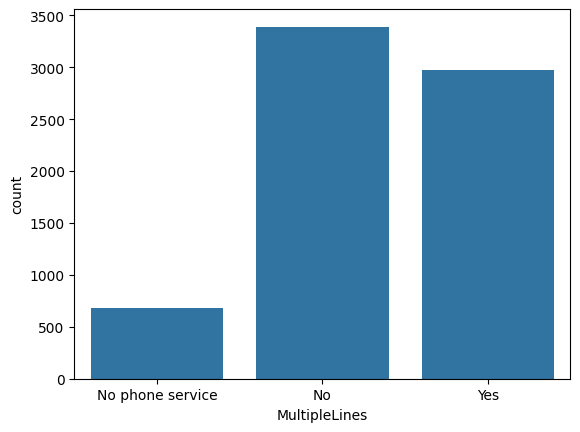

In [71]:
ax = sns.countplot(x='MultipleLines', data=data)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7043 non-null   object 
 1   gender                                7043 non-null   object 
 2   SeniorCitizen                         7043 non-null   int64  
 3   tenure                                7043 non-null   int64  
 4   InternetService                       7043 non-null   object 
 5   Contract                              7043 non-null   object 
 6   PaymentMethod                         7043 non-null   object 
 7   MonthlyCharges                        7043 non-null   float64
 8   TotalCharges                          7043 non-null   object 
 9   Partner_No                            7043 non-null   uint8  
 10  Partner_Yes                           7043 non-null   uint8  
 11  Dependents_No    

Balanceo de Datos

In [33]:
#Variable target desbalanceada


,customerID,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,1,DSL,Month-to-month,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,34,DSL,One year,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,2,DSL,Month-to-month,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,45,DSL,One year,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,2,Fiber optic,Month-to-month,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,DSL,One year,Mailed check,84.80,1990.5
7039,2234-XADUH,Female,0,72,Fiber optic,One year,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,Female,0,11,DSL,Month-to-month,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,4,Fiber optic,Month-to-month,Mailed check,74.40,306.6
